# ISL 08. Tree-Based Methods

## 8.1 The Basics of Decision Trees

의사결정트리는 회귀와 분류 둘다에 적용될 수 있습니다. 회귀에 적용되는 것을 **Regression Trees**, 분류에 적용되는 것을 **Classification Trees**라고 합니다.

### 8.1.1 Regression Trees

**Predicting Baseball Players' Salaries Using Regression Trees**

![](pic/fig8-1.png)

![](pic/fig8-2.png)

**Prediction via Stratification of the Feature Space**

1. We divide the predictor space into $J$ distinct and non-overlapping regions, $R_1, R2, ..., R_J$.
2. For every observation that falls into the region $R_j$ , we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$.

먼저 predictor space를 구별되는 그리고 겹치지 않는 $J$개의 영역 $R_1, R2, ..., R_J$로 나눕니다. 영역 $R_j$에 속하게 되는 모든 observation에 대하여, $R_j$에 속한 training observation에 대한 response의 평균으로 값을 예측합니다.

예를 들어, 2개의 영역 $R_1$과 $R_2$를 얻었다고 가정해봅시다. 이때 첫번째 영역 즉 $R_1$에 속한 training observation에 대한 response의 평균은 10, 두번째 영역 즉 $R_2$ 에 속한 training observation에 대한 response의 평균은 20입니다. 그러고 나서 주어진 관측치 $X = x$에 대하여, 만약 $x \in R_1$이라면 10으로 값을 예측할 것이고 $x \in R_2$라면 20으로 값을 예측할 것입니다.

그렇다면 이제 <U>Region $R_1, ..., R_J$를 구성하는 방법</U>에 대해 살펴보겠습니다. 앞서 살펴본 바와 같이, Region $R_1, ..., R_J$를 구성한다는 것은 predictor space를 나눈다는 것을 의미합니다. 구체적으로는 predictor space를 high-dimensional boxes (rectangles)로 나눕니다. 목표는 RSS를 최소화 하는 박스 $R_1, ..., R_J$를 찾는 것입니다.

$$ \sum_{j=1}^J \sum_{i \in R_j} \left( y_i - \hat{y}_{R_j} \right)^2 $$

\- $\hat{y}_{R_j}$ : j번째 박스에 있는 training observation에 대한 response의 평균

이를 찾기 위해 **recursive binary splitting**을 사용합니다. 먼저 recursive binary splitting은 <U>top-down</U> 즉 하향식 접근법입니다. 왜냐하면 모든 관측치가 하나의 영역에 속하는 지점인 트리의 맨 상단에서 시작하여 predictor space를 연속적으로 분할하기 때문입니다. 각 분할은 트리의 더 아래쪽에 있는 두개의 새로운 가지를 통해 표시됩니다. 또한 recursive binary splitting은 <U>greedy</U>합니다. 이는 트리를 성장시킬 때 미래에 더 나은 트리로 이어질 분할을 미리 보고 고르는 것이 아니라 해당 단계에서의 최적의 분할을 이루어냄을 의미합니다.

recursive binary splitting을 수행하기 위해서는, 먼저, predictor $X_j$와 cutpoint $s$를 선택합니다. 이때 예측 변수 공간을 $\left\{ X|X_j < s \right\}$ 및 $\left\{ X|X_j \geq s \right\}$ 영역으로 분할하는 것이 RSS의 가장 큰 감소로 이어지도록 하는 $X_j$와 $s$를 선택합니다. 즉, 모든 predictor $X_1, ..., X_p$와 각 predictor에 대하여 가능한 모든 cutpoint $s$ 값을 고려한 다음, 결과로 나오는 트리가 가장 낮은 RSS 값을 갖도록 predictor와 cutpoint를 선택합니다.

$$ R_1 \left( j, s \right) = \left\{ X | X_j < s \right\} \quad and \quad R_2 \left( j, s \right) = \left\{ X | X_j \geq s \right\} $$

$$ \sum_{i: x_i \in R_1(j,s)} \left( y_i - \hat{y}_{R_1} \right)^2 + \sum_{i: x_i \in R_2(j,s)} \left( y_i - \hat{y}_{R_2} \right)^2 $$

다음으로, 결과로 나오는 각 영역 내에서 RSS를 최소화 할 수 있도록 데이터를 더 분할하기 위해 최적의 predictor와 최적의 cutpoint를 찾아 이 과정을 반복합니다. 이때에는 전체 predictor space를 분할하는 것이 아니라 이전에 분할한 영역 중 하나를 분할합니다. 즉 이전에 분할한 2개의 영역 중 하나를 분할하여 3개의 영역을 만들어냅니다. RSS를 최소화하기 위해 다시 이 3개의 영역 중 하나를 분할합니다. 이러한 과정을 정지규칙에 도달할 때까지 반복합니다.

일단 영역 $R_1, ..., R_J$가 생성되면, 주어진 test observation이 속한 영역의 training observation에 대한 response의 평균을 사용하여 해당 test observation에 대한 response을 예측합니다.

![](pic/fig8-3.png)

**Tree Pruning**

위 과정은 training set에 대해서는 좋은 예측을 산출해낼 수도 있지만, test set에 대해서는 오버피팅으로 인해 좋은 예측을 산출해내지 못할 가능성이 있습니다. 이는 결과로 나오는 트리가 너무 복잡할 수 있다는 점에 기인합니다. 따라서 더 적은 분할 즉 더 적은 영역 $R_1, ..., R_J$을 갖는 작은 트리를 통해 더 낮은 variance와 더 나은 해석을 얻을 수 있습니다.

이에 대한 가장 좋은 대안은 아주 큰 트리 $T_0$를 성장시키고, 그러고 나서 가지치기를 하여 하위 트리를 얻는 것입니다. 즉 목표는 가장 낮은 test error rate로 이어지는 하위 트리를 선택하는 것입니다. 하위 트리가 주어지면, CV 등을 통해 test error를 추정할 수 있습니다. 그러나 모든 가능한 하위 트리에 대해 CV error를 추정할 수는 없으므로, 하위 트리의 작은 집합을 선택하는 방법 즉 Cost complexity pruning = Weakest link pruning을 사용합니다. 이는 모든 가능한 하위트리를 고려하는 것 대신, 튜닝 파라미터 $\alpha$에 의해 인덱싱된 트리들의 순서를 고려합니다. 

각각의 $\alpha$값에 대하여 대응되는 다음의 식을 가능한 한 작게 만드는 하위 트리 $T \subset T_0$가 존재합니다.

$$ \sum_{m=1}^{\left\vert T \right\vert} \sum_{x_i \in R_m} \left( y_i - \hat{y}_{R_m} \right)^2 + \alpha \left\vert T \right\vert $$

- $\left\vert T \right\vert$ : 트리 T의 터미널 노드의 숫자
- $R_m$ : $m$번째 노드에 
- $\hat{y}_{R_m}$ : predicted response

튜닝 파라미터 $\alpha$는 하위 트리의 복잡성과 training data에 대한 적합 사이의 trade-off를 제어합니다.
$\alpha = 0$이면, 위 식은 training error를 측정하는 식이 되기 때문에 하위 트리 $T$는 단순히 $T_0$가 됩니다.
$\alpha$가 증가함에 따라, 많은 터미널 노드가 있는 트리를 갖는 것에 대하여 지불해야 하는 대가가 있으므로, 위 식은 더 작은 하위 트리에 대해 최소화 되는 경향이 있을 것입니다.

위 식에서 $\alpha$를 0에서부터 증가시킴에 따라, 트리로부터 가지치기가 수행되므로 $\alpha$에 대한 함수로서 하위 트리들의 전체 순서를 얻는 것이 쉽습니다. CV 등을 사용하여 $\alpha$의 값을 선택할 수 있고, 그러고 나서 전체 데이터셋으로 돌아가 $\alpha$에 해당되는 하위 트리를 얻습니다. 

1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $\alpha$.
3. Use K-fold cross-validation to choose $\alpha$. That is, divide the training observations into $K$ folds. For each $k = 1, ..., K$:  
    (a) Repeat Steps 1 and 2 on all but the $k$th fold of the training data.   
    (b) Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of $\alpha$.  
    Average the results for each value of $\alpha$, and pick $\alpha$ to minimize the average error.
4. Return the subtree from Step 2 that corresponds to the chosen value of $\alpha$.

### 8.1.2 Classification Trees

앞서 살펴본 회귀 트리는 양적 response를 예측하는 데에 사용합니다. 대조적으로, <U>분류 트리는 질적 response를 예측하는 데에 사용합니다.</U> 회귀 트리에서는, 같은 터미널 노드에 속하는 training observation의 response의 평균으로 observation에 대한 response를 예측합니다. 반면 분류 트리에서는, <U>같은 터미널 노드에 속하는 training observation의 response의 클래스 중 가장 흔하게 발생하는 클래스로 observation에 대한 response를 예측합니다.</U> 때때로 특정 터미널 노드 영역에 해당하는 클래스 예측 뿐만 아니라, 특정 토미널 노드 영역에 해당하는 클래스 비율에 관심을 갖기도 합니다.

회귀 트리와 마찬가지로, 분류 트리를 성장시키기 위해서 recursive binary splitting을 사용합니다. 회귀 트리에서는 binary split을 만드는 기준으로 RSS를 사용합니다. 분류 트리에서는 binary split을 만드는 기준으로 **Classification error rate**, **Gini index**, **Entropy**를 사용합니다.

먼저 **Classification error rate**입니다.

$$ E = 1 - \max_k \left( \hat{p}_{mk} \right)$$

\- $\hat{p}_{mk}$ : the proportion of training observations im the $m$th region that are from the $k$th class

오분류율은 해당 영역에서 가장 일반적인 클래스에 속하지 않는 training observation의 비율을 의미합니다. 그러나 이는 트리를 성장시키는 데에 충분히 민감하지 않다고 여겨져 이에 대한 대안으로 **Gini index**가 등장합니다.

$$ G = \sum_{k=1}^K \hat{p}_{mk} \left( 1 - \hat{p}_{mk} \right) $$

\- $\hat{p}_{mk}$ : the proportion of training observations im the $m$th region that are from the $k$th class

지니 계수는 $K$개의 클래스에 걸친 total variance를 나타냅니다. 지니 계수는 모든 $\hat{p}_{mk}$가 0 또는 1에 가깝다면 작은 값을 갖습니다. 이러한 이유로 지니 계수는 node purity에 대한 척도로 여겨집니다. 지니 계수가 작은 값을 갖는다는 것은 노드가 주로 단일의 클래스의 관측치를 포함함을 나타내기 때문입니다. 지니 계수에 대한 대안으로 **Entropy**도 존재합니다.

$$ D = - \sum_{k=1}^K \hat{p}_{mk} \log \hat{p}_{mk} $$

\- $\hat{p}_{mk}$ : the proportion of training observations im the $m$th region that are from the $k$th class

엔트로피는 지니 계수와 마찬가지로 $m$번째 노드가 순수하다면 작은 값을 갖습니다. 실제로 지니 계수와 엔트로피는 수치 상 상당히 비슷하다고 합니다.

### 8.1.3 Trees vs. Linaer Models

$$ Linear \; Regression : f(X) = \beta_0 + \sum_{j=1}^p X_j \beta_j $$
$$ Regression \; Trees : f(X) = \sum_{m=1}^M c_m \cdot 1_{\left( X \in R_m \right)} $$ 

**Which model is better?**

feature와 response 사이의 관계가 선형적인 경우에는 선형 모델을 사용하는 것이 더 좋은 결과를 가져올 수 있습니다. 반면 feature과 response 사이의 관계가 비선형적이고 복잡한 경우에는 의사결정트리를 사용하는 것이 더 좋은 결과를 가져올 수 있습니다. 

![](pic/fig8-7.png)

<center>
상단 : true decision boundary = linear 일 때 선형 모델 (왼쪽) 및 의사결정트리 (오른쪽) <br>
하단 : true decision boundary = non-linear 일 때 선형 모델 (왼쪽) 및 의사결정트리 (오른쪽)
</center>

물론 이러한 test error 측면 이외에 다른 측면을 고려해볼 수도 있습니다. <U>예를 들어, 모델의 해석(interpretability)과 시각화(visualization)를 위해 트리를 사용하는 것을 선호할 수도 있습니다.</U>

### 8.1.4 Advantages and Disadvantages of Trees

**장점**

- 트리는 사람들에게 설명하기에 매우 쉽습니다.
- 트리가 다른 접근들보다 인간의 의사결정을 더 잘 반영한다고 볼 수 있습니다.
- 트리는 시각적으로 표현될 수 있고, 그래서 심지어 비전문가조차도 쉽게 해석할 수 있습니다.
- 트리는 더미 변수를 생성하지 않고도 질적 predictor를 쉽게 다룰 수 있습니다.  

**단점**

- 트리는 일반적으로 예측 정확도가 좋지 않습니다.
- 트리는 매우 non-robust 할 수 있습니다. 즉, 데이터의 작은 변화가 최종 트리에 큰 변화를 야기할 수 있습니다.

## 8.2 Bagging, Random Forests, Boosting

앞으로 소개할 Bagging, Random Forest, Boosting은 앞 절에서 소개한 decision tree의 high variance 문제를(overfitting) 해결하기 위한 방법들!!인데 내용이 그리 많지는 않아요. 금방 끝날 것 같아요..!

### 8.2.1 Bagging

#### Bootstrap Aggregating
기본 아이디어는 '평균이 분산을 줄인다는 것'
<br> 우리가 잘 알고 있듯이 등분산 $\sigma^2$인 $Z_{1}$ ~ $Z_{n}$ 을 iid로 추출하는 상황에서 그 평균 $\bar{Z_{n}}$은 $\sigma^2/n$이 그 분산이다

현실적으로 모집단에서 데이터를 반복 추출할 수는 없으니, bootstrap을 이용하여 주어진 trainig set에 대하여 B번 반복 추출로 B개의 training set을 생성해내고 각각에 대해서 prune하지 않은 tree(모델)를 만든다. B개의 모델에 대한 결과를 평균해서 최종 결과를 얻는다.
<br> 이때 각 tree는 low bias, high variance. 평균을 내서 variance를 줄여주는 아이디어
<br> 다만 각 training data set이 독립이 아니므로 모델 간 covariance 크다. variance가 생각만큼 줄지 않아요!

Var[($Z_{1}$+..+$Z_{n}$)/n]=$1/n^2$ * {Var($Z_{1}$)+...+Var($Z_{n}$)+∑∑Cov($Z_{i}$,$Z_{j}$)}
 
=$1/n^2$ * {n$\sigma^2$+∑∑Cov($Z_{i}$,$Z_{j}$)}

=$\sigma^2/n$+$1/n^2$ * {∑∑Cov($Z_{i}$,$Z_{j}$)}

covariance 항이 존재하게 되는 상황!

- out of bag(OOB)

B번의 bootstrap 과정에서 보통 1/3 정도의 data는 추출되지 않는데 이들은 out of bag라고 한다. 그 이름에서도 직관적으로 알 수 있죠!
<br> 이들은 자동적으로 validation set이 됨.
뒤집어 생각하면 특정 데이터 $x_{i}$가 B개의 tree 또는 모델 중에서 B/3개의 모델에는 없다는 소리인데 B/3개의 모델들을 이용해서 $x_{i}$에 대한 예측값들을 평균낼 수 있겠죠?! 이렇게 모든 데이터 $x_{1}$ ~ $x_{n}$에 대해 예측을 하면 OOB MSE 또는 classification error를 구할 수 있습니다.
<br> 충분히 큰 n 과 B에 대해서는 cross validation을 별도로 진행하지 않아도 된다고 하는데 웬만하면 cross validation이 나은 것 같네요

- variable importance measure

B개의 tree를 고려하면서 decision tree의 이점이 상쇄되었다. 즉 B개의 모델을 고려하면서 해석력을 잃었죠.(덜 직관적이 됐다는 뜻이겠죠) 대신 예측력이 높아졌지만..!
<br> RSS나 Gini index를 이용하여 각 예측변수의 중요도에 순서를 매길 수 있어요.
<br> 회귀에서 보면, B개의 모델에서 각 변수로 인한 split에서 RSS가 얼마나 감소했는지를 평균해서 구합니다. 해당 변수로 평균적으로 RSS가 많이 감소했다면 중요한 변수가 되겠죠! classification의 경우 Gini index를 이용합니다.

<img src='pic/Lab8-1.png'></img>

### 8.2.2 Random Forests

Bagging에서 correlation 때문에 covariance가 존재해서 분산이 애초의 의도보다는 큰 수준이었죠?! random forest는 correlation을 줄여서 variance를 더 줄이는 방법입니다.

<br> correlation에 대해서 조금 살펴보자면..
<br> 어떤 예측변수 하나가 매우 강력한/중요한 변수이고, 나머지는 적절하게 강력한 예측변수인 상황이에요.
<br> 비록 bootstrap을 통해서 다른 B개의 data set을 이용한다고 해도 B개의 tree들은 split을 할 때 가장 강력한 하나의 변수를 top split으로 삼게 되겠죠. top split이 똑같은 tree들이 B개 만들어지니까 correlation을 가질 수 밖에 없는 구조입니다. 이후는 variance의 감소를 충분히 이끌어내지 못하는 결과고요.

<br> 그래서 random forest가 bagging과 다른 점은 다음과 같습니다. B번 bootstrap된 데이터를 이용해서 B개의 tree들을 만드는데 각 split에서 전체 p개의 변수가 아니라 랜덤하게 선택된 m개의 변수만 고려해요. (보통 m = $\sqrt{p}$) -->> 왜 random forest인지 이해가 되네요!!
<br> 위에서 설명한 강력한 예측변수 하나의 영향을 제어하게 될 겁니다. 그 이외 변수들까지 고려하게 되므로 각 tree들은 이전보다 decorrelated된 결과를 이끌어내겠죠. bagging보다 random forest에서 error가 작다는 걸 아래 그림에서도 볼 수 있어요.

<img src='pic/Lab8-2.png'></img>

### 8.2.3 Boosting

강력하지는 않을 수 있는데 보완에 초점을 맞춘 방법이라고 해요. weak model을 그보다는 strong model로 만드는 일련의 과정으로 이해했습니다.

Bagging에서 B개의 tree가 만들어지는 과정은 독립적이었다. correlation이 존재하긴 했지만 그와 별개로 과정 자체는 독립적이라는 의미이다.
<br> 반면 Boosting에서는 tree들이 순차적으로 만들어진다는 차이가 있다!! 즉 이전의 tree를 기반으로 새로운 tree가 만들어지는 과정이 반복되는 것이다. 각각의 tree는 원래의 training data에서 (이전의 tree를 토대로) 수정된 training data set에 적합을 한다.

분류 문제로 부스팅을 이해해 볼게요!
<br>부스팅은 잘못 분류된 개체들에 집중하여 새로운 분류규칙을 만드는 단계를 반복하는 방법

<br>일반적으로 잘못 분류된 개체들을 더 잘 분류하는 것이 목적이기에(variance보다는 bias!!) 이들에 집중하여 새로운 분류규칙을 설정하는 단계를 반복해요. 앞서 설명한 weak에서 strong으로 보완하는 방법이라는 게 어느 정도 이해가 되죠?? 여기서 중요한 건 예측변수를 순차적으로 설정한다는 것인데 이것이 bagging과 가장 큰 차이점입니다. 병렬과 직렬st.

<br>구체적으로, raw data에서는 같은 가중치로 출발하지만 모델링을 거칠수록 잘못 분류된 개체에는 큰 가중치를 부여하면서 오류를 수정해내가는 방법. 결과적으로 예측모형의 정확도를 향상시킴. 앞서 설명한 "수정된" training data set이라는 의미도 이해하셨을 것 같네요!

<img src='pic/Lab8-2-1.png'></img>
<img src='pic/Lab8-2-2.png'></img>

첨언하자면, 수정된 training data set에 적합을 한다는 의미는, 다음 모델 적합시 본래의 data set y값이 아니라 예측하지 못한 residual에 적합을 한다는 의미예요. 이전의 잘못 분류한 개체에 집중한다는 것과 일맥상통합니다!!

다시 한번 단계별로 살펴보면 다음과 같습니다.

1. 최종 예측값 $\hat{f}$(x)=0에서 출발합니다. 첫 번째 실행에서는 residual $r_{i}$ = $y_{i}$ 겠죠
2. 아래의 과정을 B번만큼 반복해요.
    - d개의 split을 가지고 있는 tree를 (X,r)에 적합하여, tree $\hat{f}$를 만든다. 첫번째 실행은 기존의 (X,Y)에의 적합이 되는거죠
    - $\hat{f}$(x) = $\hat{f}$(x) + $\lambda$ * $\hat{f}$
    - $r_{i}$ = $r_{i}$ - $\lambda$ * $\hat{f}$


3. 결과적으로 $\hat{f}$(x) = $\sum \lambda$ * $\hat{f}$
<br> 왜냐면 $\hat{f}$(x)이 0에서 출발했으니까요!

앞서 줄글로 길게 설명한 residual에 적합한다는 의미가 와닿습니다. $\lambda$가 learning rate 역할을 하면서 최종 예측값과 잔차를 업데이트 해나가죠? 결과적으로 예측정확도도 올라갈 거라고 생각할 수 있습니다. classification은 책의 범위를 넘어가는지 다루지 않네요.

한편 hyper-parameter가 3가지 있는데요
- tree 개수 B .. variance 줄이는 bagging과 달리 bias 줄이는 데 초점 맞추기 때문에 너무 큰 B값은 overfitting 유발.
- learning rate 역할을 한다고 했던 $\lambda$ .. 작은 $\lambda$ 값에 대해서는 B가 어느 정도 커야 업데이트가 제대로 될 것이에요. 제자리 걸음하면 의미가 없으니까요
- split 개수 d .. 각 tree가 얼마나 복잡한지의 지표. d가 클수록 bias 낮고 variance 높고. 첫 번째 parameter에서 살펴봤듯이 bias 줄이는 게 목적이라서 d=1로 작게 설정하는 경우가 많다네요. <br> 이 경우 하나의 변수만을 포함하니까 additive로 생각할 수 있고 뒤집어 생각해보면 d를 interaction의 깊이로 볼 수 있겠네요.

<img src='pic/Lab8-3.png'></img>

## 8.3 Lab: Decision Trees

### 8.3.1 Fitting Classification Trees

In [1]:
library(tree)

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



In [2]:
library(ISLR)
attach(Carseats)
High = ifelse(Sales<=8, 'No', 'Yes')

In [3]:
Carseats = data.frame(Carseats, High)

In [4]:
tree.carseats = tree(High~. -Sales, Carseats)

In [5]:
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

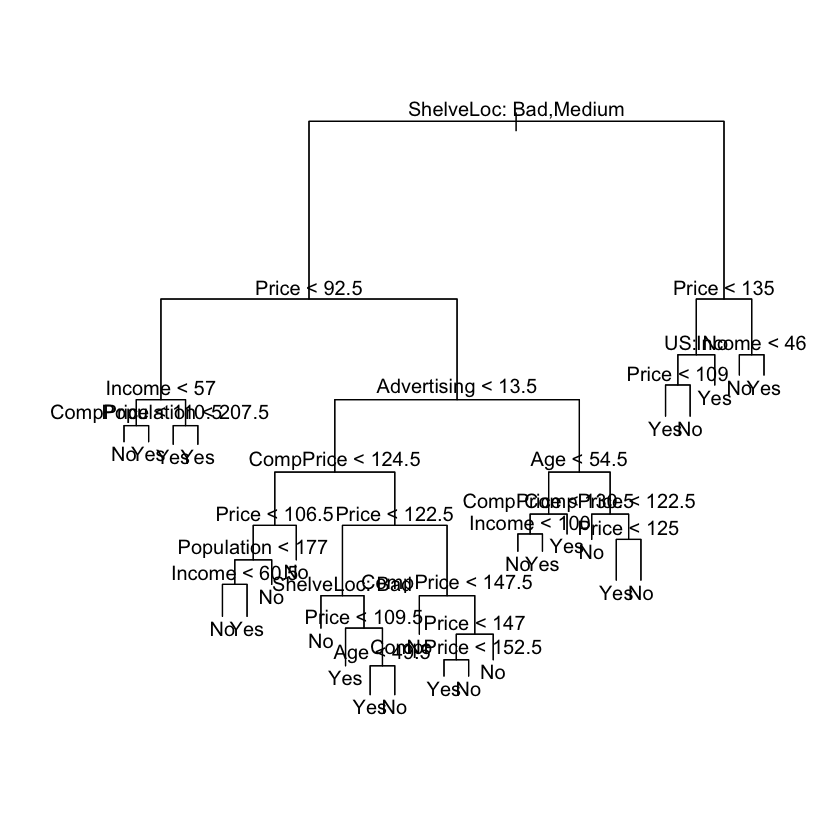

In [6]:
plot(tree.carseats)
text(tree.carseats, pretty=0)

In [7]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [8]:
set.seed (2)
train = sample(1:nrow(Carseats), 200)
Carseats.test = Carseats[-train,]
High.test = High[-train]
tree.carseats = tree(High~.-Sales, Carseats, subset=train)
tree.pred = predict(tree.carseats, Carseats.test, type="class")
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  104  33
      Yes  13  50

In [9]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats, FUN=prune.misclass)

In [10]:
names(cv.carseats)

[1] "size"   "dev"    "k"      "method"

In [11]:
cv.carseats

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

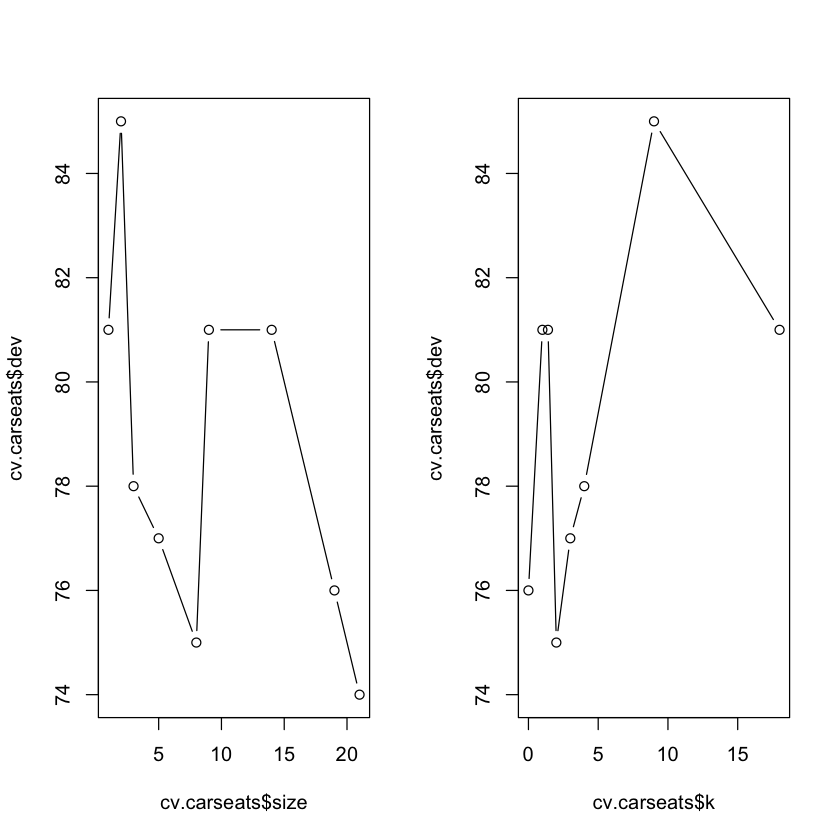

In [12]:
par(mfrow=c(1,2))
plot(cv.carseats$size, cv.carseats$dev, type='b')
plot(cv.carseats$k, cv.carseats$dev, type='b')

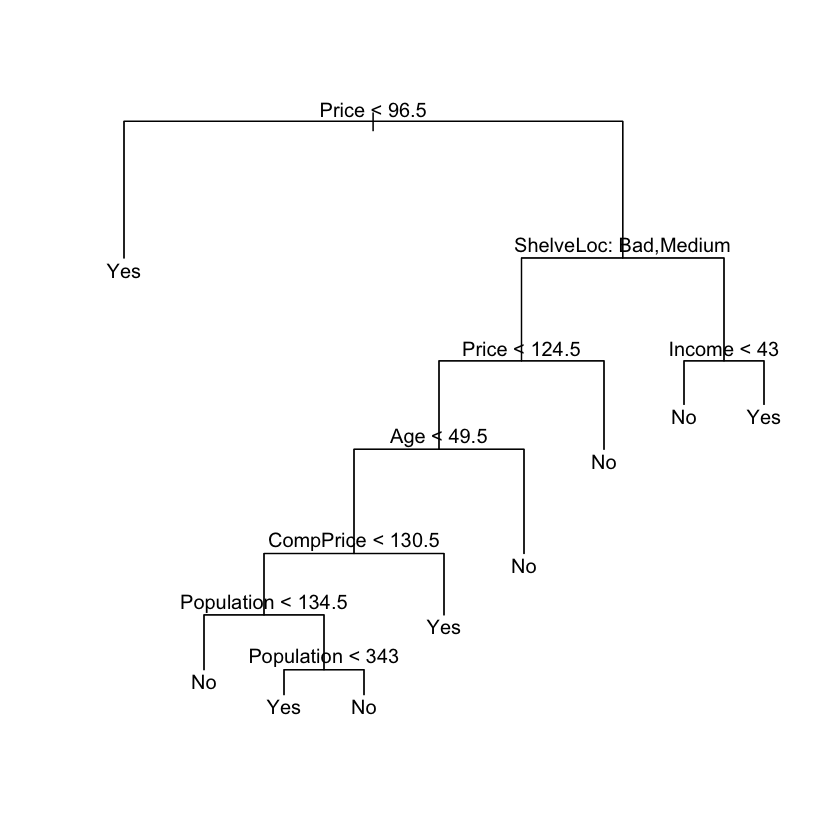

In [13]:
prune.carseats = prune.misclass(tree.carseats, best=9)
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [14]:
tree.pred = predict(prune.carseats, Carseats.test, type='class')
table(tree.pred, High.test)

         High.test
tree.pred No Yes
      No  97  25
      Yes 20  58

In [15]:
(97+58)/200

[1] 0.775

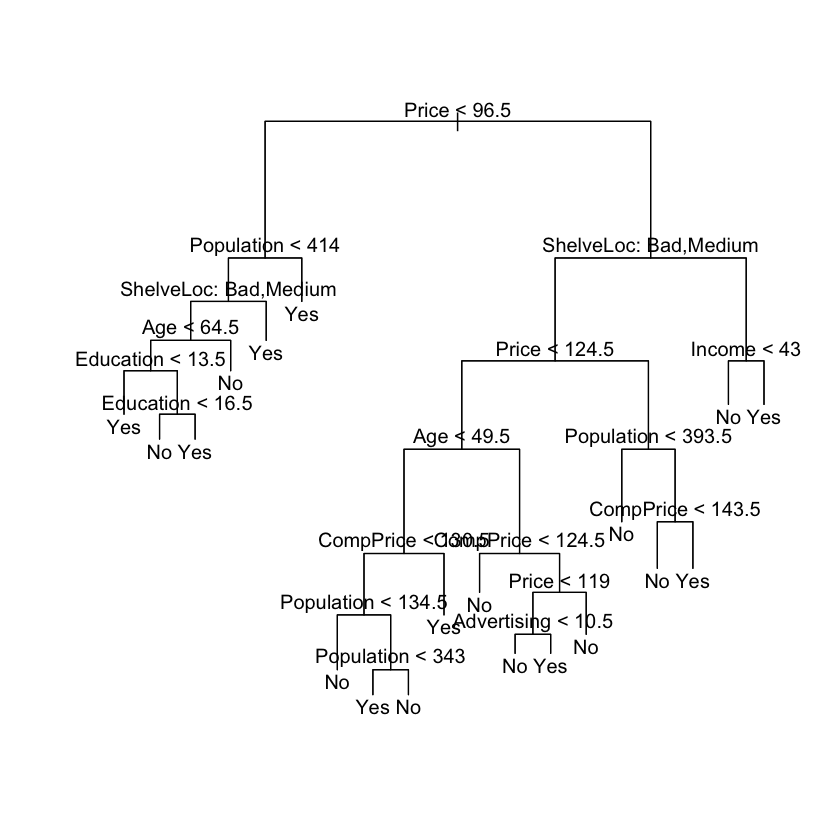

In [16]:
prune.carseats = prune.misclass(tree.carseats, best=15)
plot(prune.carseats)
text(prune.carseats, pretty=0)

In [17]:
tree.pred = predict(prune.carseats, Carseats.test, type='class')
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

In [18]:
(102+53)/200

[1] 0.775

### 8.3.2 Fitting Regression Trees

In [19]:
library(MASS)

Warning message:
“package ‘MASS’ was built under R version 3.6.2”

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [20]:
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)
tree.boston = tree(medv~., Boston, subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

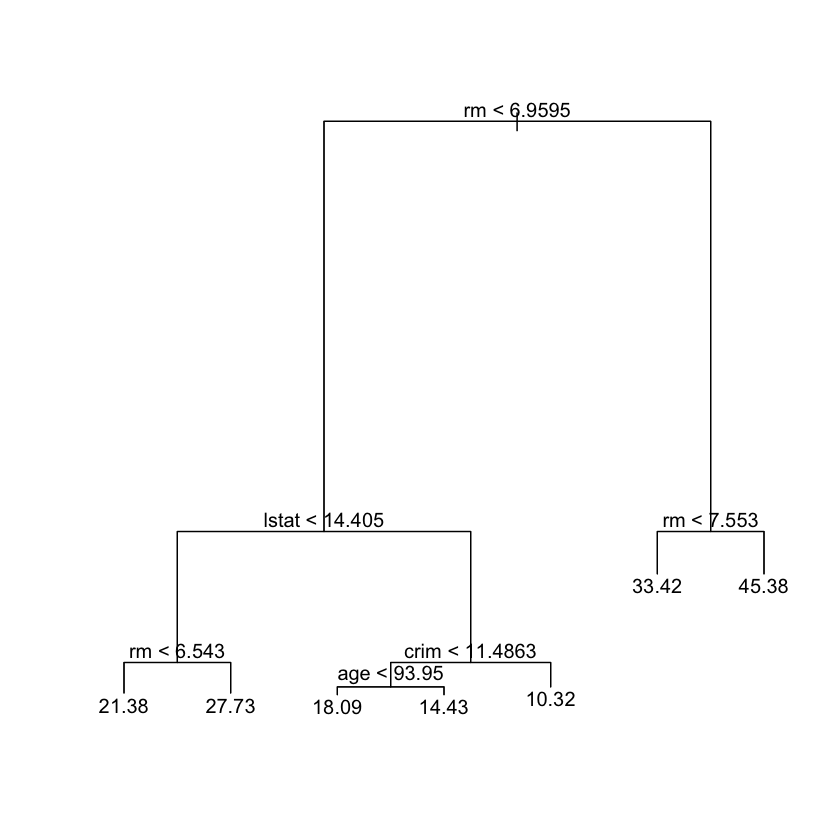

In [21]:
plot(tree.boston)
text(tree.boston, pretty=0)

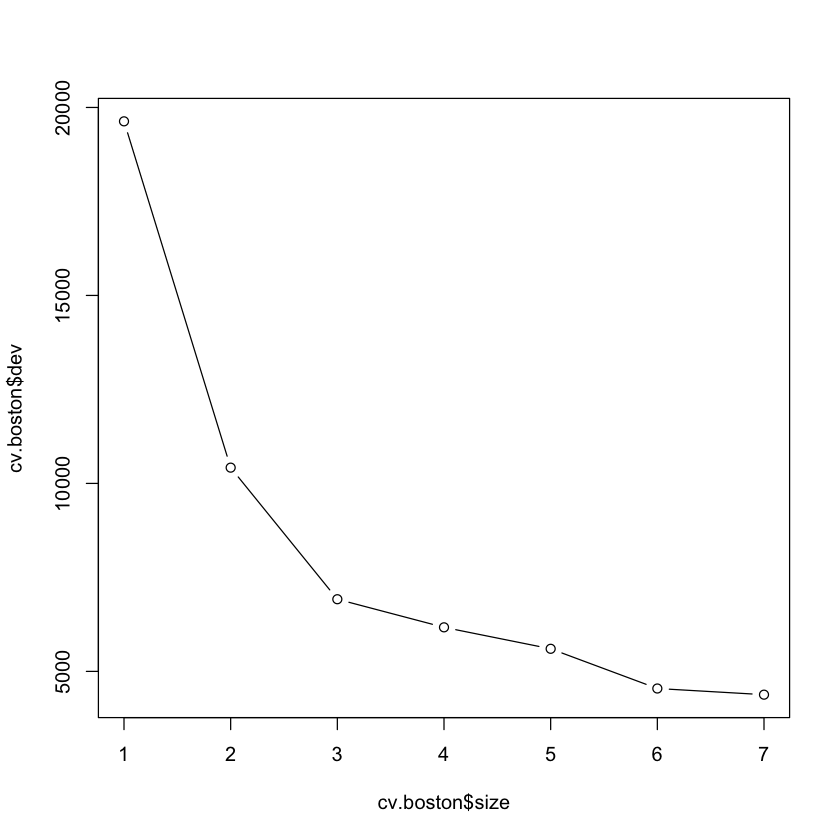

In [22]:
cv.boston = cv.tree(tree.boston)
plot(cv.boston$size, cv.boston$dev, type='b')

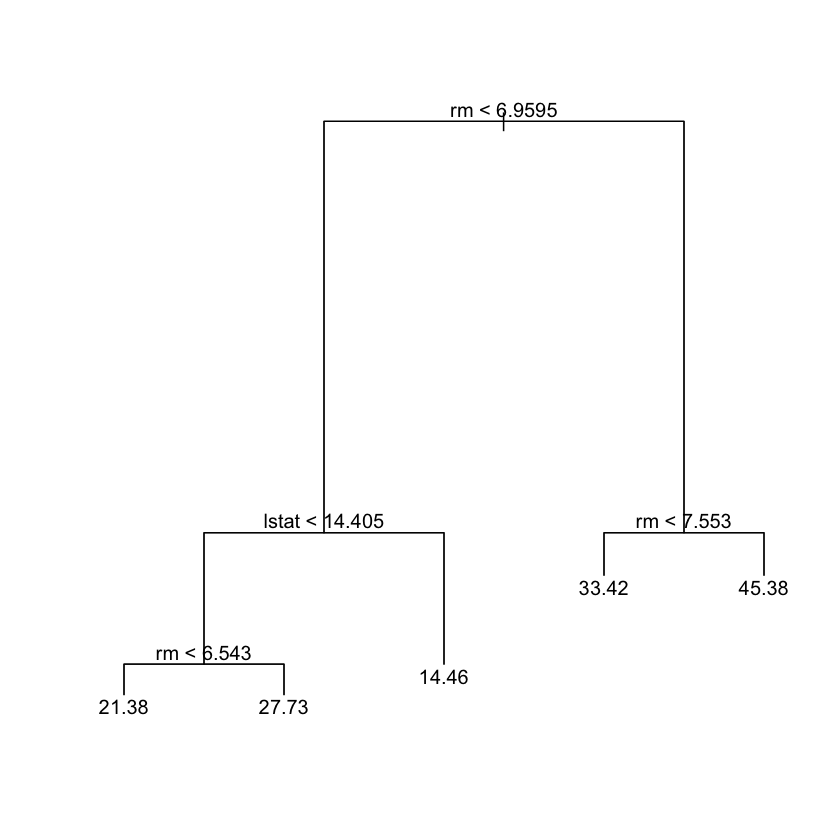

In [23]:
prune.boston = prune.tree(tree.boston, best=5)
plot(prune.boston)
text(prune.boston, pretty=0)

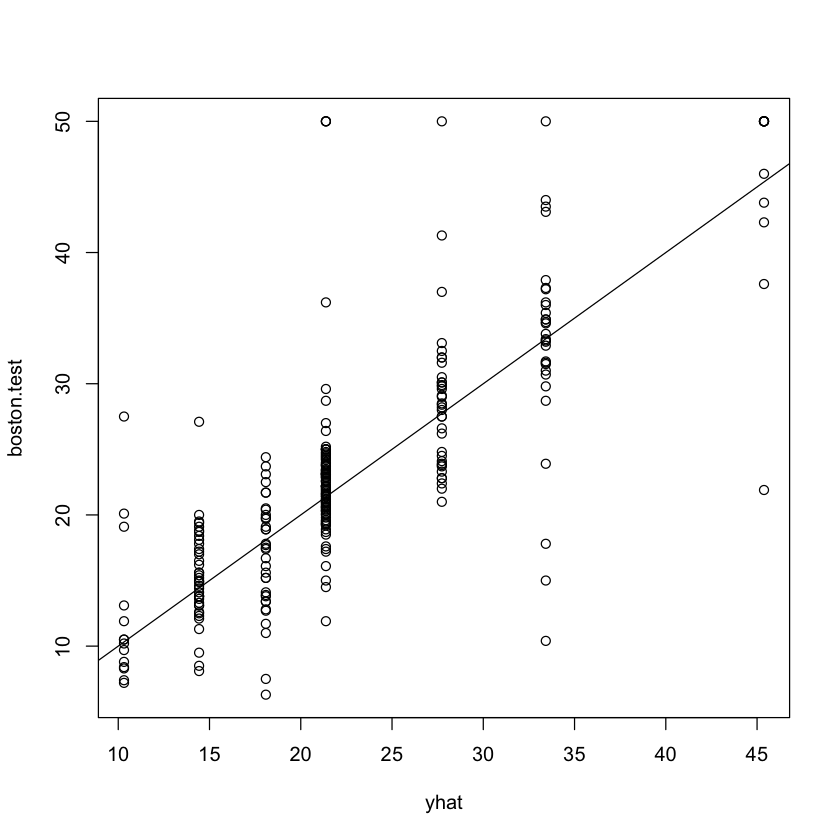

In [24]:
yhat = predict(tree.boston, newdata=Boston[-train,])
boston.test = Boston[-train, 'medv']
plot(yhat, boston.test)
abline(0, 1)

In [25]:
mean((yhat-boston.test)^2)

[1] 35.28688

### 8.3.3 Bagging and Random Forests

In [26]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [27]:
set.seed(1)
bag.boston = randomForest(medv~., data=Boston, subset=train, mtry=13, importance=TRUE)
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 11.39601
                    % Var explained: 85.17

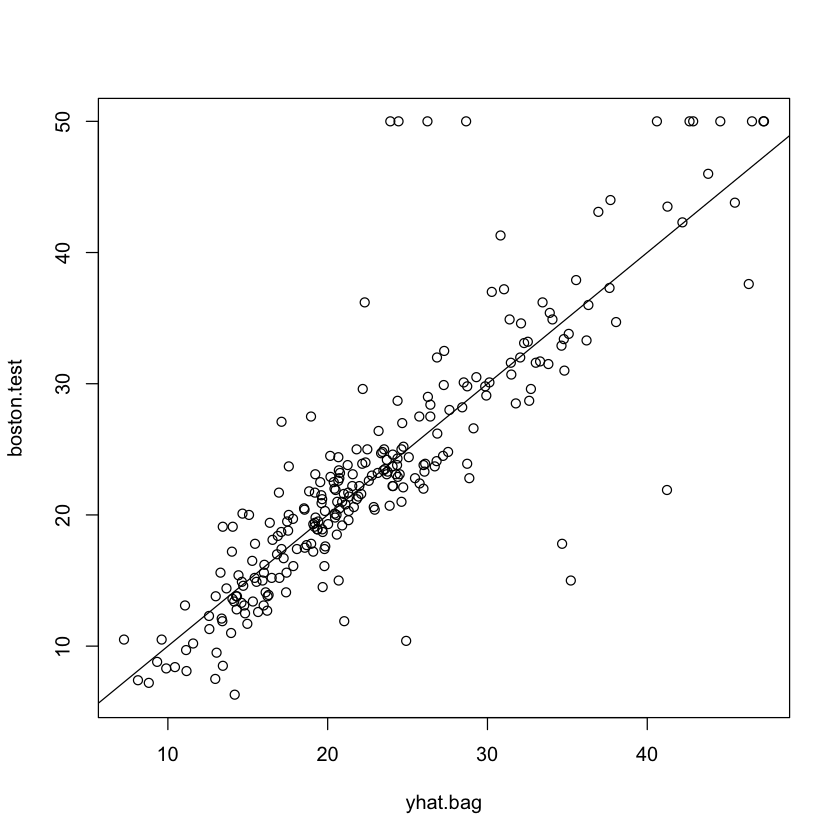

In [28]:
yhat.bag = predict(bag.boston, newdata=Boston[-train,])
plot(yhat.bag, boston.test)
abline(0, 1)

In [29]:
mean((yhat.bag-boston.test)^2)

[1] 23.59273

In [30]:
bag.boston = randomForest(medv~., data=Boston, subset=train, mtry=13, ntree=25)
yhat.bag = predict(bag.boston, newdata=Boston[-train,])
mean((yhat.bag-boston.test)^2)

[1] 23.66716

In [31]:
set.seed(1)
rf.boston = randomForest(medv~., data=Boston, subset=train, mtry=6, importance=TRUE)
yhat.rf = predict(rf.boston, newdata=Boston[-train,])
mean((yhat.rf-boston.test)^2)

[1] 19.62021

In [32]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,16.697017,1076.08786
zn,3.625784,88.35342
indus,4.968621,609.53356
chas,1.061432,52.21793
nox,13.518179,709.87339
rm,32.343305,7857.65451
age,13.272498,612.21424
dis,9.032477,714.94674
rad,2.878434,95.80598
tax,9.118801,364.92479


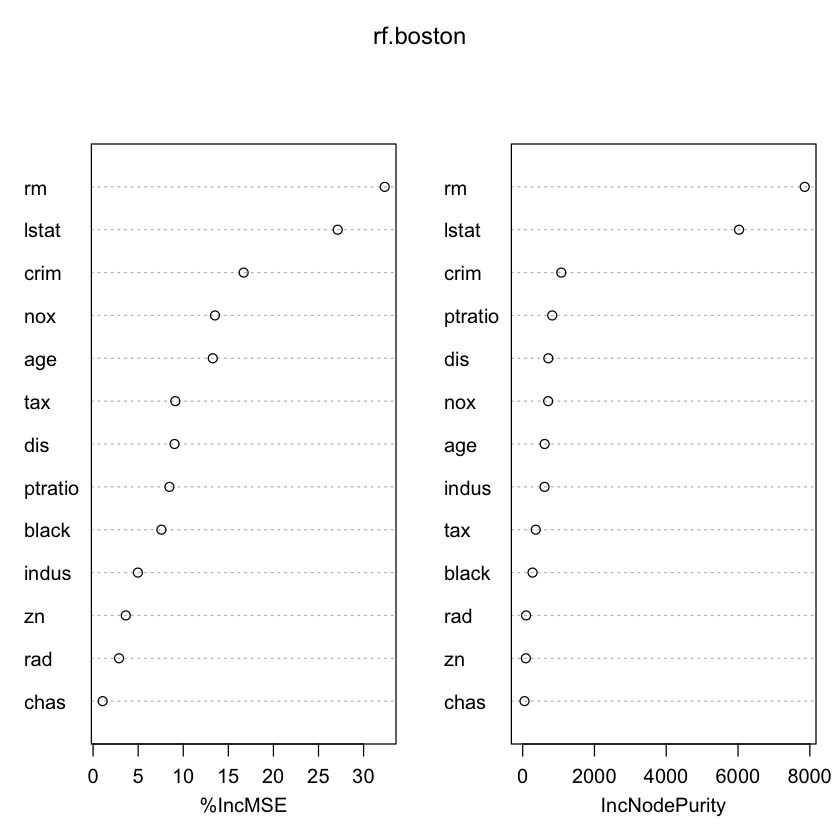

In [33]:
varImpPlot(rf.boston)

### 8.3.4 Boosting

In [34]:
library(gbm)

Loaded gbm 2.1.5



,var,rel.inf
,<fct>,<dbl>
rm,rm,43.9919329
lstat,lstat,33.1216941
crim,crim,4.2604167
dis,dis,4.0111090
nox,nox,3.4353017
black,black,2.8267554
age,age,2.6113938
ptratio,ptratio,2.5403035
tax,tax,1.4565654


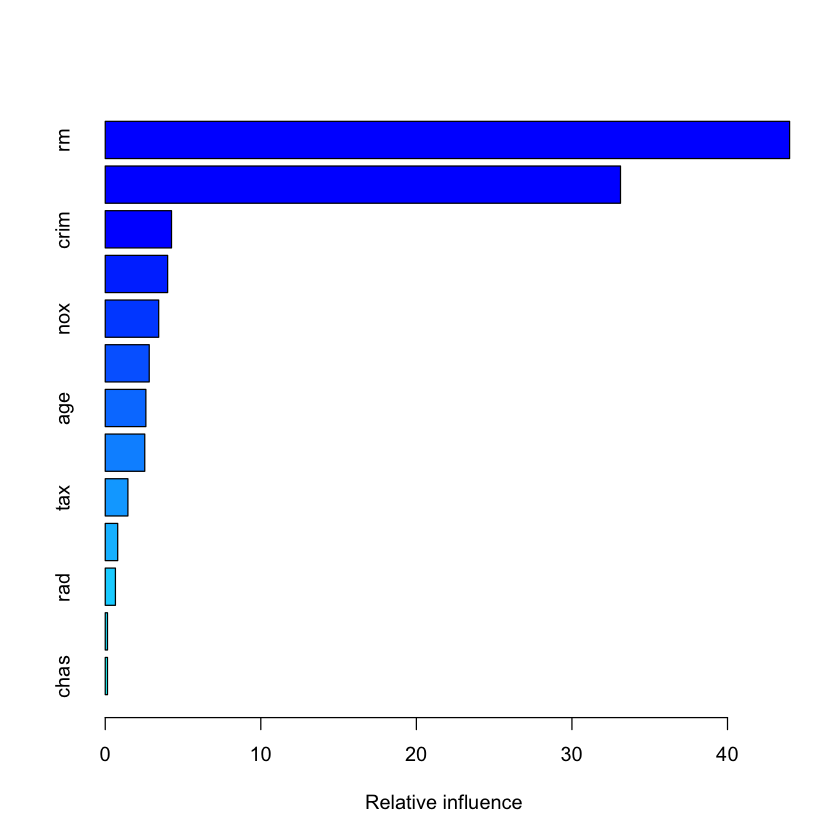

In [35]:
set.seed(1)
boost.boston = gbm(medv~., data=Boston[train,], distribution='gaussian', n.trees=5000, interaction.depth=4)
summary(boost.boston)

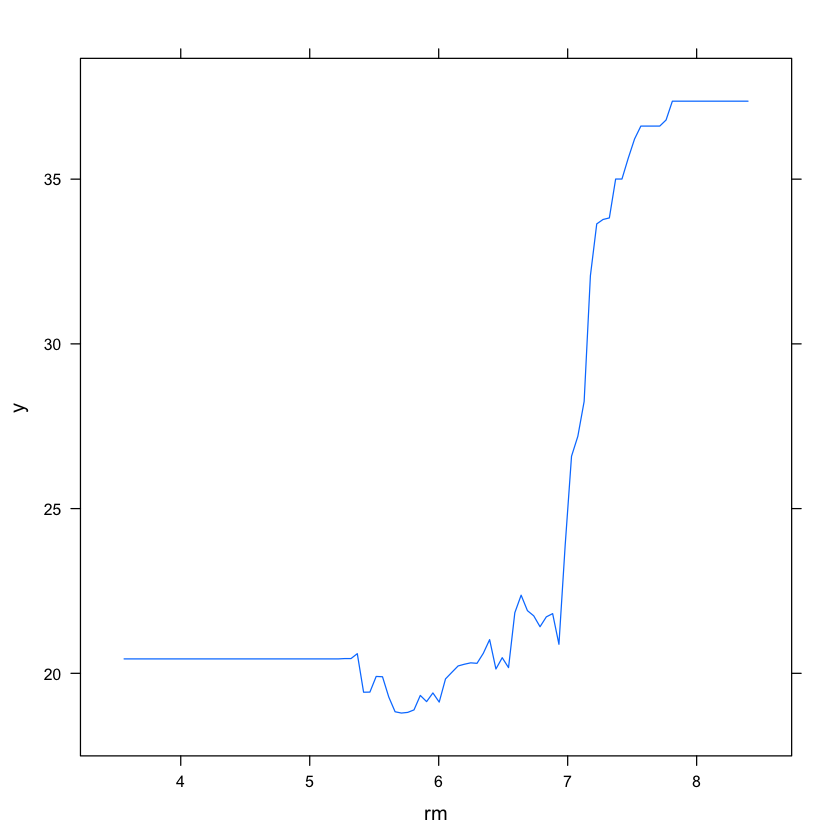

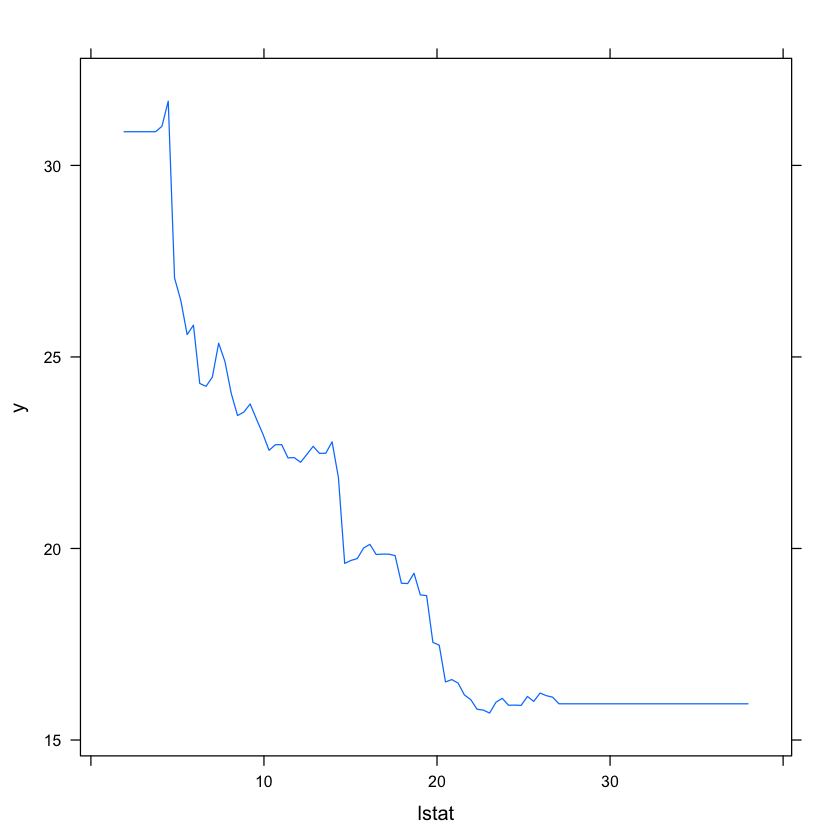

In [36]:
par(mfrow=c(1,2))
plot(boost.boston, i='rm')
plot(boost.boston, i='lstat')

In [37]:
yhat.boost = predict(boost.boston, newdata=Boston[-train,], n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 18.84709

In [38]:
boost.boston = gbm(medv~., data=Boston[train,], distribution='gaussian', n.trees=5000, interaction.depth=4, shrinkage=0.2, verbose=F)
yhat.boost = predict(boost.boston, newdata=Boston[-train,], n.trees=5000)
mean((yhat.boost-boston.test)^2)

[1] 18.33455